# Квадратурные формулы

$
f(x) = 2 cos(3.5x) exp({5x \over 3}) + 3 sin(1.5x) exp(−4x) + 3 ,
\\
a = 1.5, b = 2.3, α = 1/5, β = 0;
$

In [2]:
a = 1.5
b = 2.3
alpha = 1/5
beta = 0

In [3]:
def f(x):
    it1 = 2 * np.cos(3.5 * x) * np.exp(5/3 * x)
    it2 = 3 * np.sin(1.5 * x) * np.exp(-4 * x) + 3
    return it1 + it2

**Весовая функция**
$
p(x) = (x - a)^{-\alpha} (b - x)^{-\beta}
$

In [4]:
def p(x, a, b):
    it1 = (x - a)**(-alpha)
    it2 = (b - x)**(-beta)
    return it1 * it2

In [5]:
def px_func(x, j, a, b):
    return p(x, a, b) * (x**j)

In [6]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = np.linspace(a, b, 200)
Y = f(X)

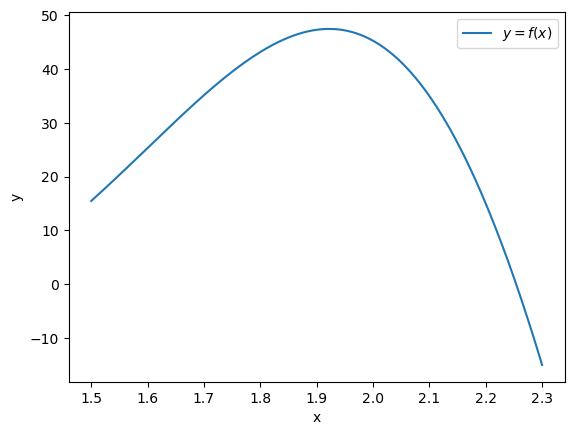

In [8]:
plt.plot(X, Y, label='$ y = f(x) $')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
None

In [9]:
def fp(x):
    return f(x) * p(x, a=a, b=b)

In [10]:
exact_value, exact_err_rate = quad(fp, a, b)
print('Точное значение интеграла:', exact_value)

Точное значение интеграла: 32.2195145288426


## Решение с помощью КФ

Зададим узлы:

$
x_1 = a
\\
x_2 = {a + b \over 2}
\\
x_3 = b
$

In [11]:
x1 = a
x2 = (a + b) / 2
x3 = b

### 1. Метод Ньютона-Котса

#### Интерполяционная квадратурная формула

In [12]:
x1 = a
x2 = (a + b) / 2
x3 = b

Вычислим моменты:

In [13]:
n = 3
mu = [quad(px_func, a, b, args=(i, a, b))[0] for i in range(n)]
mu = np.array(mu)
mu

array([1.04563955, 1.94024228, 3.65924051])

$
A_j \ - \ коэффициенты
\\
x_j^s \ - \ матрица \ СЛАУ
\\
\mu_s \ - \ свободный \ вектор
\\
СЛАУ: \ x * A = s
$

In [14]:
x = [
    [x1**0, x2**0, x3**0],
    [x1**1, x2**1, x3**1],
    [x1**2, x2**2, x3**2],
]

x = np.array(x)
x

array([[1.  , 1.  , 1.  ],
       [1.5 , 1.9 , 2.3 ],
       [2.25, 3.61, 5.29]])

In [15]:
A = np.linalg.solve(x, mu)
A

array([0.2489618 , 0.66389813, 0.13277963])

**Оценка методической погрешности**

$
R_n (f) = J(f) - \sum_{j=1}^{n}{A_j f(x_j)}
$

In [16]:
res = abs(exact_value - sum([A[i] * f(x[1, i]) for i in range(3)]))
print('Методическая погрешность:', res)
print('Погрешность "точного" метода:', exact_err_rate)

Методическая погрешность: 1.0453328839877116
Погрешность "точного" метода: 1.8411583369015716e-10


## 2. Квадратурные формулы типа Гаусса

Вычислим моменты:

In [17]:
n = 3
mu = [quad(px_func, a, b, args=(i, a, b))[0] for i in range(2*n)]
mu = np.array(mu)
mu

array([ 1.04563955,  1.94024228,  3.65924051,  7.01168933, 13.64149196,
       26.92274969])

$
A_j \ - \ коэффициенты
\\
x_j^s \ - \ матрица \ СЛАУ
\\
\mu_s \ - \ свободный \ вектор
\\
СЛАУ: \ x * A = s
$

In [18]:
M = [
    mu[i:i+n] for i in range(n)
]

M = -np.array(M)
M

array([[ -1.04563955,  -1.94024228,  -3.65924051],
       [ -1.94024228,  -3.65924051,  -7.01168933],
       [ -3.65924051,  -7.01168933, -13.64149196]])

In [19]:
A = np.linalg.solve(M, mu[n:])
A

array([-6.52278947, 10.57344827, -5.65862069])

In [20]:
coeffs = [1.0] + A[::-1].tolist()
roots = np.roots(coeffs)
x1, x2, x3 = roots
roots

array([2.2046392 , 1.88136608, 1.57261541])

In [21]:
x = [
    [x1**i, x2**i, x3**i] for i in range(n)
]

x = np.array(x)
x

array([[1.        , 1.        , 1.        ],
       [2.2046392 , 1.88136608, 1.57261541],
       [4.86043402, 3.53953831, 2.47311923]])

In [22]:
A = np.linalg.solve(x, mu[:n])
A

array([0.25145833, 0.4434833 , 0.35069793])

**Оценка методической погрешности**

$
R_n (f) = J(f) - \sum_{j=1}^{n}{A_j f(x_j)}
$

In [23]:
res = abs(exact_value - sum([A[i] * f(x[1, i]) for i in range(3)]))
print('Методическая погрешность:', res)
print('Погрешность "точного" метода:', exact_err_rate)

Методическая погрешность: 0.014158648413307162
Погрешность "точного" метода: 1.8411583369015716e-10
